## AFFINITY PROPAGATION:

* Affinity Propagation automatically determined the number of customer clusters, showing well-formed groupings.

* Works well with small to medium datasets(Complexity grows with data size due to pairwise comparisons.)
* Non-convex clusters(Can find clusters with irregular shapes (unlike K-Means).)

In [45]:
ap = AffinityPropagation(random_state=42)
ap.fit(x_reduced)


AffinityPropagation(random_state=42)

In [46]:
df['AP_Cluster'] = ap.labels_


In [47]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AP_Cluster
0,1957,2,4,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,3,11,1,332
1,1954,2,4,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,3,11,0,0
2,1965,2,5,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,3,11,0,8
3,1984,2,5,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,3,11,0,1
4,1981,4,3,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,3,11,0,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,46,709,43,182,...,0,0,0,0,0,0,3,11,0,39
2236,1946,4,5,64014.0,2,1,56,406,0,30,...,0,0,0,1,0,0,3,11,0,297
2237,1981,2,2,56981.0,0,0,91,908,48,217,...,0,1,0,0,0,0,3,11,0,8
2238,1956,3,5,69245.0,0,1,8,428,30,214,...,0,0,0,0,0,0,3,11,0,39


In [48]:
print(f"Number of clusters found: {len(set(ap.labels_))}")
print(df['AP_Cluster'].value_counts())

Number of clusters found: 428
AP_Cluster
152    100
8       88
332     70
39      69
391     68
      ... 
162      1
165      1
166      1
168      1
427      1
Name: count, Length: 428, dtype: int64


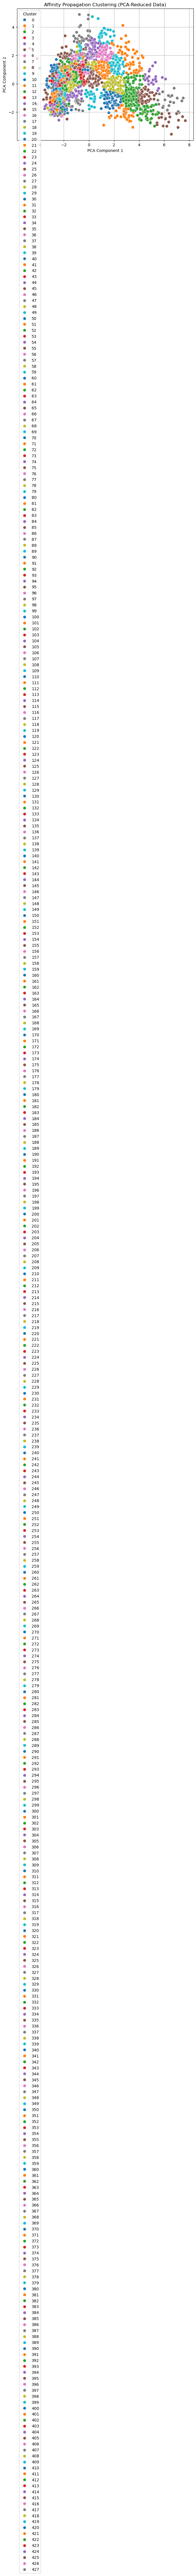

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_reduced[:, 0], y=x_reduced[:, 1], hue=df['AP_Cluster'], palette='tab10', s=60)
plt.title("Affinity Propagation Clustering (PCA-Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [50]:
sil_score = silhouette_score(x_reduced, df['AP_Cluster'])
sil_score

0.18945137717736124